In [102]:
import pandas as pd
import pymysql

conn = pymysql.connect(
                        user    = 'FIFA',
                        passwd  = 'FIFA!',
                        host    = "3.83.154.197",
                        port    = 3306,
                        db      = 'FIFA',
                        charset = 'utf8'
        )


reviews = pd.read_sql("SELECT name, class_id, reviews FROM reviews", conn)
reviews

/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,class_id,reviews
0,데이비드 시먼,101,ㅋㅋㅋㅋ이2새2끼 한 10판동안 존2나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까...
1,데이비드 시먼,101,아 장점하나 더 있다. 멀던가능 하프라인까지 던져짐. 훈련코치 먹이면 더 멀리도 가능할듯
2,데이비드 시먼,101,잉국 친선용 콘시먼 후기하... 이형 꽁지머리 간지 유일한 잉글국대 레전드 키퍼로 ...
3,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...
4,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...
...,...,...,...
250557,엄원상,510,살다살다 라부 6을 받는 선수는 처음이네... 은카 풀캐미 속도가 22토티 손흥민3...
250558,엄원상,510,축신이네 ㅋㅋ
250559,엄원상,510,새로운 적폐 k살라
250560,김태환,510,아니 딱 7카만 만들어서 쓰려하는데 은카 6트해서 한장 주는거 실화냐 ㅋㅋ 19a테...


In [103]:
lists = ["쪽지", "판매", "팔아", "사요", "카톡", "가격", "ㅋㅋㅋㅋㅋ", "신규", "팝니", "삽니", "연락", "추천", "어때", "억", "1빠", "하한", "상한", "실력", "볼타", "재료", "VS", "vs", "비교", "실분", "ㅇㅈ", "https", "넥필", "넥스트", "떡상", "전재산" ,"영끌", "매물", "임대", "보유", "일베", "잼민", "초딩", "성격", "듣보잡", "사주", "영상", "장사", "구매", "인벤", "둘다", '급구', '금카', '실패', '도전', '1등', '성공', '톡', '5카', '6카', '7카', '8카', '은카', r'[?&]', r'[▇&]', '싶']
for list in lists:
    reviews = reviews[~reviews["reviews"].str.contains(list)]  
reviews = reviews.loc[reviews['class_id'] < 294]
reviews.reset_index(drop=True, inplace=True)
reviews

,name,class_id,reviews
0,데이비드 시먼,101,ㅋㅋㅋㅋ이2새2끼 한 10판동안 존2나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까...
1,데이비드 시먼,101,아 장점하나 더 있다. 멀던가능 하프라인까지 던져짐. 훈련코치 먹이면 더 멀리도 가능할듯
2,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...
3,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...
4,데이비드 시먼,101,아니 정무야 급여라도 낮게 해주던가잘 막게라도 해주던가 둘 중 하나는 하게 해줘야지
...,...,...,...
180833,윌리암 살리바,265,똑똑하고 깔끔한것 같네요. 저는 너무 맘에 듭니다.
180834,레길론,265,미페가 제발 나오길..
180835,데얀 쿨루세브스키,265,"플레이 메이킹이 탁월함 ㄹㅇ 패스스텟좋아서 야무지고, zd 왼발걸리면 10번차면 7..."
180836,데얀 쿨루세브스키,265,약발 삑 ㅈ1ㄴ 심함+ 몸싸움 ㅈㄴ 흐물흐물함침투 너무 잘해서이적 시장으로 침투해버림;


In [104]:
import re
from tqdm import tqdm

def clean_text(d):
  pattern = r'[^가-힣a-zA-Z\s]'
  text = re.sub(pattern, '', d)
  text = re.sub("\n", ' ', text)
  text = re.sub("  +", " ", text)
  return text

tqdm.pandas()
reviews['reviews'] = reviews.reviews.progress_apply(clean_text)
reviews


100%|██████████| 180838/180838 [00:01<00:00, 102409.92it/s]


,name,class_id,reviews
0,데이비드 시먼,101,이새끼 한 판동안 존나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까지 점 판남았는데...
1,데이비드 시먼,101,아 장점하나 더 있다 멀던가능 하프라인까지 던져짐 훈련코치 먹이면 더 멀리도 가능할듯
2,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...
3,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...
4,데이비드 시먼,101,아니 정무야 급여라도 낮게 해주던가잘 막게라도 해주던가 둘 중 하나는 하게 해줘야지
...,...,...,...
180833,윌리암 살리바,265,똑똑하고 깔끔한것 같네요 저는 너무 맘에 듭니다
180834,레길론,265,미페가 제발 나오길
180835,데얀 쿨루세브스키,265,플레이 메이킹이 탁월함 패스스텟좋아서 야무지고 zd 왼발걸리면 번차면 번 골 조금아...
180836,데얀 쿨루세브스키,265,약발 삑 심함 몸싸움 흐물흐물함침투 너무 잘해서이적 시장으로 침투해버림


In [105]:
icon_reviews = pd.read_csv("./ICON_Reviews.csv", index_col=0)
icon_reviews

,name,class_id,reviews,label
0,데이비드 시먼,101,ㅋㅋㅋㅋ이2새2끼 한 10판동안 존2나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까...,1
1,데이비드 시먼,101,아 장점하나 더 있다. 멀던가능 하프라인까지 던져짐. 훈련코치 먹이면 더 멀리도 가능할듯,1
2,데이비드 시먼,101,잉국 친선용 콘시먼 후기하... 이형 꽁지머리 간지 유일한 잉글국대 레전드 키퍼로 ...,0
3,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0
4,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0
...,...,...,...,...
16123,페렌츠 푸스카스,101,약발 2는 좀;;ㅋㅋ 잘 쓰시는건 알겠는데 오바는 ㅎㅎ;,-1
16124,페렌츠 푸스카스,101,이번 메타에서 개좋을 숨겨진 보석인듯 솔직히 약발2로 나왔어도 상관은 없었을거 같고...,1
16125,페렌츠 푸스카스,101,에이전트에서 뽑아서 50판정도 써본 후기키는 작아도 건장이라 몸빵 지리고 중거리랑 ...,1
16126,페렌츠 푸스카스,101,곧 올라올 원창연 리뷰 꼭보시길,-1


In [106]:
lists = ["쪽지", "판매", "팔아", "사요", "카톡", "가격", "ㅋㅋㅋㅋㅋ", "신규", "팝니", "삽니", "연락", "추천", "어때", "억", "1빠", "하한", "상한", "실력", "볼타", "재료", "VS", "vs", "비교", "실분", "ㅇㅈ", "https", "넥필", "넥스트", "떡상", "전재산" ,"영끌", "매물", "임대", "보유", "일베", "잼민", "초딩", "성격", "듣보잡", "사주", "영상", "장사", "구매", "인벤", "둘다", '급구', '실패', '도전', '1등', '성공', '톡', r'[?&]', r'[▇&]', '싶']
for list in lists:
    icon_reviews = icon_reviews[~icon_reviews["reviews"].str.contains(list)]  
icon_reviews['reviews'] = icon_reviews.reviews.progress_apply(clean_text)
icon_reviews.reset_index(drop=True, inplace=True)
icon_reviews

100%|██████████| 14223/14223 [00:00<00:00, 117913.89it/s]


,name,class_id,reviews,label
0,데이비드 시먼,101,이새끼 한 판동안 존나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까지 점 판남았는데...,1
1,데이비드 시먼,101,아 장점하나 더 있다 멀던가능 하프라인까지 던져짐 훈련코치 먹이면 더 멀리도 가능할듯,1
2,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0
3,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0
4,데이비드 시먼,101,아니 정무야 급여라도 낮게 해주던가잘 막게라도 해주던가 둘 중 하나는 하게 해줘야지,0
...,...,...,...,...
14218,페렌츠 푸스카스,101,약발 는 좀 잘 쓰시는건 알겠는데 오바는,-1
14219,페렌츠 푸스카스,101,이번 메타에서 개좋을 숨겨진 보석인듯 솔직히 약발로 나왔어도 상관은 없었을거 같고 ...,1
14220,페렌츠 푸스카스,101,에이전트에서 뽑아서 판정도 써본 후기키는 작아도 건장이라 몸빵 지리고 중거리랑 감차...,1
14221,페렌츠 푸스카스,101,곧 올라올 원창연 리뷰 꼭보시길,-1


In [107]:
icon_reviews.loc[(icon_reviews["reviews"] == '') | (icon_reviews["reviews"] == ' '), 'reviews'] = None
icon_reviews.isnull().sum()

name          0
class_id      0
reviews     213
label         0
dtype: int64

In [108]:
icon_reviews = icon_reviews.dropna(axis=0)
icon_reviews.isnull().sum()

name        0
class_id    0
reviews     0
label       0
dtype: int64

In [109]:
icon_reviews.reset_index(drop=True, inplace=True)
icon_reviews.loc[icon_reviews['label'] == -1, 'label'] = 2
icon_reviews

,name,class_id,reviews,label
0,데이비드 시먼,101,이새끼 한 판동안 존나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까지 점 판남았는데...,1
1,데이비드 시먼,101,아 장점하나 더 있다 멀던가능 하프라인까지 던져짐 훈련코치 먹이면 더 멀리도 가능할듯,1
2,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0
3,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0
4,데이비드 시먼,101,아니 정무야 급여라도 낮게 해주던가잘 막게라도 해주던가 둘 중 하나는 하게 해줘야지,0
...,...,...,...,...
14005,페렌츠 푸스카스,101,약발 는 좀 잘 쓰시는건 알겠는데 오바는,2
14006,페렌츠 푸스카스,101,이번 메타에서 개좋을 숨겨진 보석인듯 솔직히 약발로 나왔어도 상관은 없었을거 같고 ...,1
14007,페렌츠 푸스카스,101,에이전트에서 뽑아서 판정도 써본 후기키는 작아도 건장이라 몸빵 지리고 중거리랑 감차...,1
14008,페렌츠 푸스카스,101,곧 올라올 원창연 리뷰 꼭보시길,2


In [110]:
from konlpy.tag import Okt

tagger = Okt()
icon_reviews['token'] = icon_reviews.reviews.progress_apply(tagger.morphs)

100%|██████████| 14010/14010 [02:03<00:00, 113.47it/s]
/var/folders/f0/dnr__kl94mdgsv025xlblkmc0000gn/T/ipykernel_1279/4010038166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icon_reviews['token'] = icon_reviews.reviews.progress_apply(tagger.morphs)


In [111]:
icon_reviews

,name,class_id,reviews,label,token
0,데이비드 시먼,101,이새끼 한 판동안 존나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까지 점 판남았는데...,1,"[이, 새끼, 한, 판, 동안, 존나, 어이없게, 먹혀서, 팔, 려고, 잠금, 해제..."
1,데이비드 시먼,101,아 장점하나 더 있다 멀던가능 하프라인까지 던져짐 훈련코치 먹이면 더 멀리도 가능할듯,1,"[아, 장점, 하나, 더, 있다, 멀던, 가능, 하프, 라인, 까지, 던져, 짐, ..."
2,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0,"[개, 병신, 새끼, 쳐, 막는걸, 못, 봤어, 위치, 선정, 도, 안, 돼, 중거..."
3,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0,"[내, 가, 고급, 여, 키퍼, 를, 딱, 둘, 써, 봄, 주, 공, 반데사르, 랑..."
4,데이비드 시먼,101,아니 정무야 급여라도 낮게 해주던가잘 막게라도 해주던가 둘 중 하나는 하게 해줘야지,0,"[아니, 정무, 야, 급여, 라도, 낮게, 해주던가잘, 막게라도, 해주던가, 둘, ..."
...,...,...,...,...,...
14005,페렌츠 푸스카스,101,약발 는 좀 잘 쓰시는건 알겠는데 오바는,2,"[약, 발, 는, 좀, 잘, 쓰시는건, 알겠는데, 오, 바, 는]"
14006,페렌츠 푸스카스,101,이번 메타에서 개좋을 숨겨진 보석인듯 솔직히 약발로 나왔어도 상관은 없었을거 같고 ...,1,"[이번, 메타, 에서, 개, 좋을, 숨겨진, 보석, 인, 듯, 솔직히, 약, 발, ..."
14007,페렌츠 푸스카스,101,에이전트에서 뽑아서 판정도 써본 후기키는 작아도 건장이라 몸빵 지리고 중거리랑 감차...,1,"[에이전트, 에서, 뽑아서, 판정, 도, 써, 본, 후기, 키, 는, 작아도, 건장..."
14008,페렌츠 푸스카스,101,곧 올라올 원창연 리뷰 꼭보시길,2,"[곧, 올라올, 원창연, 리뷰, 꼭, 보시길]"


In [112]:
def stopword(x):
  stopword = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '에', '은', '는', '하', '새끼', '병신', '좆', '에서']
  return [i for i in x if i not in stopword]

icon_reviews["token"] = icon_reviews.token.progress_apply(stopword)
icon_reviews

100%|██████████| 14010/14010 [00:00<00:00, 44887.86it/s]
/var/folders/f0/dnr__kl94mdgsv025xlblkmc0000gn/T/ipykernel_1279/3289727320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icon_reviews["token"] = icon_reviews.token.progress_apply(stopword)


,name,class_id,reviews,label,token
0,데이비드 시먼,101,이새끼 한 판동안 존나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까지 점 판남았는데...,1,"[판, 동안, 존나, 어이없게, 먹혀서, 팔, 려고, 잠금, 해제, 했더니, 승격,..."
1,데이비드 시먼,101,아 장점하나 더 있다 멀던가능 하프라인까지 던져짐 훈련코치 먹이면 더 멀리도 가능할듯,1,"[아, 장점, 하나, 더, 있다, 멀던, 가능, 하프, 라인, 까지, 던져, 짐, ..."
2,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0,"[개, 쳐, 막는걸, 못, 봤어, 위치, 선정, 안, 돼, 중거리슛, 못, 막아, ..."
3,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0,"[내, 고급, 여, 키퍼, 딱, 둘, 써, 봄, 주, 공, 반데사르, 랑, 콘시먼,..."
4,데이비드 시먼,101,아니 정무야 급여라도 낮게 해주던가잘 막게라도 해주던가 둘 중 하나는 하게 해줘야지,0,"[아니, 정무, 야, 급여, 라도, 낮게, 해주던가잘, 막게라도, 해주던가, 둘, ..."
...,...,...,...,...,...
14005,페렌츠 푸스카스,101,약발 는 좀 잘 쓰시는건 알겠는데 오바는,2,"[약, 발, 쓰시는건, 알겠는데, 오, 바]"
14006,페렌츠 푸스카스,101,이번 메타에서 개좋을 숨겨진 보석인듯 솔직히 약발로 나왔어도 상관은 없었을거 같고 ...,1,"[이번, 메타, 개, 좋을, 숨겨진, 보석, 인, 듯, 솔직히, 약, 발, 로, 나..."
14007,페렌츠 푸스카스,101,에이전트에서 뽑아서 판정도 써본 후기키는 작아도 건장이라 몸빵 지리고 중거리랑 감차...,1,"[에이전트, 뽑아서, 판정, 써, 본, 후기, 키, 작아도, 건장, 이라, 몸빵, ..."
14008,페렌츠 푸스카스,101,곧 올라올 원창연 리뷰 꼭보시길,2,"[곧, 올라올, 원창연, 리뷰, 꼭, 보시길]"


In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(icon_reviews['token'], icon_reviews['label'], test_size =.2, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11208,), (2802,), (11208,), (2802,))

In [189]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [190]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 22875
등장 빈도가 2번 이하인 희귀 단어의 수: 16245
단어 집합에서 희귀 단어의 비율: 71.01639344262296
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.923141391222583


In [191]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6631


In [192]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [193]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)

In [194]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

11207
11207


In [195]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train)) / len(X_train))

리뷰 최대 길이: 504
리뷰 평균 길이: 17.460872668867673


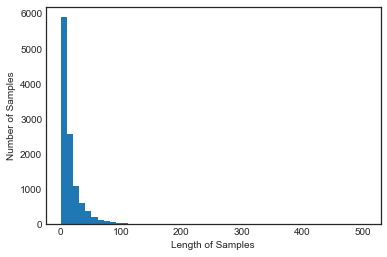

In [196]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [197]:
max_len = 25

In [198]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [199]:
embedding_dim = max_len # 임베딩 벡터의 차원
dropout_ratio = 0.4 # 드롭아웃 비율
num_filters = 3 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

In [200]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding = 'valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 25)          165775    
                                                                 
 dropout_24 (Dropout)        (None, None, 25)          0         
                                                                 
 conv1d_12 (Conv1D)          (None, None, 3)           228       
                                                                 
 global_max_pooling1d_12 (Gl  (None, 3)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_24 (Dense)            (None, 128)               512       
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                     

In [201]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('TextCNN_best_model(learning_rate).h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [206]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate = 0.005), loss='sparse_categorical_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_split = 0.2, callbacks=[es, mc], batch_size = 128)

Epoch 1/20
69/71 [============================>.] - ETA: 0s - loss: 0.2684 - acc: 0.9000
Epoch 1: val_acc did not improve from 0.70919
71/71 [==============================] - 3s 21ms/step - loss: 0.2703 - acc: 0.8993 - val_loss: 1.2222 - val_acc: 0.6450
Epoch 2/20
67/71 [===========================>..] - ETA: 0s - loss: 0.2615 - acc: 0.8990
Epoch 2: val_acc did not improve from 0.70919
71/71 [==============================] - 1s 11ms/step - loss: 0.2609 - acc: 0.8987 - val_loss: 1.2926 - val_acc: 0.6615
Epoch 3/20
69/71 [============================>.] - ETA: 0s - loss: 0.2512 - acc: 0.9047
Epoch 3: val_acc did not improve from 0.70919
71/71 [==============================] - 1s 11ms/step - loss: 0.2508 - acc: 0.9051 - val_loss: 1.3082 - val_acc: 0.6624
Epoch 4/20
66/71 [==========================>...] - ETA: 0s - loss: 0.2445 - acc: 0.9091
Epoch 4: val_acc did not improve from 0.70919
71/71 [==============================] - 1s 11ms/step - loss: 0.2430 - acc: 0.9094 - val_loss: 1.338

In [207]:
loaded_model = load_model('TextCNN_best_model(learning_rate).h5')
loaded_model.evaluate(X_test, y_test)

88/88 [==============================] - 0s 2ms/step - loss: 0.8273 - acc: 0.6874


[0.8272720575332642, 0.6873661875724792]

In [215]:
from tensorflow.keras.layers import LSTM
import keras

model = Sequential()
model.add(Embedding(vocab_size, 25))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = keras.optimizers.Nadam(learning_rate = 0.005),
              loss = keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 25)          165775    
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 512)        577536    
 nal)                                                            
                                                                 
 dropout_26 (Dropout)        (None, None, 512)         0         
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 512)        1574912   
 nal)                                                            
                                                                 
 dropout_27 (Dropout)        (None, None, 512)         0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 512)            

In [216]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('BILSTM_best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [217]:
history = model.fit(X_train, y_train, epochs=20, validation_split = 0.2, callbacks=[es, mc], batch_size = 128)

Epoch 1/20
71/71 [==============================] - ETA: 0s - loss: 0.9629 - accuracy: 0.5913
Epoch 1: val_accuracy improved from -inf to 0.67529, saving model to BILSTM_best_model.h5
71/71 [==============================] - 91s 1s/step - loss: 0.9629 - accuracy: 0.5913 - val_loss: 0.9948 - val_accuracy: 0.6753
Epoch 2/20
71/71 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.7279
Epoch 2: val_accuracy did not improve from 0.67529
71/71 [==============================] - 74s 1s/step - loss: 0.6949 - accuracy: 0.7279 - val_loss: 0.9977 - val_accuracy: 0.5263
Epoch 3/20
71/71 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.7663
Epoch 3: val_accuracy improved from 0.67529 to 0.68689, saving model to BILSTM_best_model.h5
71/71 [==============================] - 77s 1s/step - loss: 0.6037 - accuracy: 0.7663 - val_loss: 0.8474 - val_accuracy: 0.6869
Epoch 4/20
71/71 [==============================] - ETA: 0s - loss: 0.4952 - accuracy: 0.8148
Epo

In [218]:
loaded_model = load_model('BILSTM_best_model.h5')
loaded_model.evaluate(X_test, y_test)

88/88 [==============================] - 18s 153ms/step - loss: 0.9307 - accuracy: 0.7095


[0.9306879639625549, 0.7094932198524475]

In [263]:
def sentiment_predict(new_sentence):
    tokenizer = Tokenizer(6631, oov_token='OOV')
    stopword = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '에', '은', '는', '하', '새끼', '병신', '좆', '에서']
    new_token = [word for word in Okt().morphs(new_sentence) if word not in stopword]
    tokenizer.fit_on_texts(new_token)
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=25)
    loaded_model = keras.models.load_model("./BILSTM_best_model.h5")
    answer = loaded_model.predict(new_pad)
    return int(answer.argmax()), np.max(answer)

In [264]:
sentiment_predict("너무 아쉬워요")

1/1 [==============================] - 3s 3s/step


(2, 0.8996631)